# Problem Set 3, due October 1 at 11:59pm.

### Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Part 1 will be relatively easy; Part 2 will take more time.

In [554]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import time
from scipy import linalg
import statsmodels.api as sm
import copy 

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://www.kellogg.northwestern.edu/faculty/weber/emp/_session_3/boston.htm).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [125]:
# load Boston housing data set
data = np.loadtxt('data.txt')
target = np.loadtxt('target.txt')

## Side note: 
You can use the IPython to easily debug your code. Just add the line IPython.embed() as a break point at some place in
your code and it will give you access to a Python terminal where you can view the values that specific variables get, their dimensions etc. The pdb package in Python is also similar to IPython. 

---

## Part 1: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.
Before beginning the "real" work, refamiliarize yourself with the dataset.

### 1.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation). Do not use a built-in function (other than sqrt) to compute RMSE.



In [126]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print(compute_rmse((2,2,3),(0,2,6)))
2.08
"""
def compute_rmse(predictions, yvalues):
    
    #convert input into array
    if type(predictions)!=np.ndarray:
        predictions = np.array(predictions)
        
    if type(yvalues)!=np.ndarray:
        yvalues = np.array(yvalues)
    
    n = len(predictions)
    mean_squared = (predictions-yvalues)**2
    rmse = np.sqrt(np.sum(mean_squared)/n)
    return rmse

### 1.2 Divide your data into training and testing datasets

Randomly select 80% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 20% in a testing dataset (call this "bdata_test")


In [127]:
#combining data into dataframe 
boston_data = pd.DataFrame(data)
boston_data.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
boston_data['MEDV']= target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.218960,18.0,2.629288,0.0,0.869420,6.875396,65.2,4.347275,1.0,307.0,15.534711,397.462329,5.715647,24.0
1,0.141576,0.0,7.315612,0.0,0.549711,6.499894,78.9,5.315684,2.0,255.0,17.914131,397.012611,9.338417,21.6
2,0.380457,0.0,7.340354,0.0,0.697928,7.263489,61.1,5.356935,2.0,243.0,17.919989,396.628236,4.142473,34.7
3,0.313563,0.0,2.562407,0.0,0.599629,7.209732,45.8,6.103983,3.0,226.0,18.979527,398.564784,3.239272,33.4
4,0.330105,0.0,2.497337,0.0,0.476077,7.184111,54.2,6.264372,3.0,234.0,18.708888,399.487766,6.115159,36.2


In [134]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

#function for splitting data
def split_data(data,size):
    
    #shuffling the data randomly
    data = data.sample(frac=1).reset_index(drop=True)
    
    #Train Test split based on size
    test=data[: int(size*len(data))]
    train=data[int(size*len(data)):]
    
    return train,test

bdata_train,bdata_test= split_data(boston_data,0.2)

bdata_train.reset_index(drop=True, inplace=True)
bdata_test.reset_index(drop=True, inplace=True)

### 1.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Specifically, do the following:
1. Compute the RMSE of the training set.
2. Now compute the RMSE on the test data set (but use the model you trained on the training set!).
3. How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?
4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in red. Make sure to label your axes appropriately, and add a legend to your figure to make clear which dots are which.
5. Add code to your function to measure the running time of your algorithm. How long does it take to compute the predicted values for the test data?

In [598]:
#Mean value baseline model
baseline_model = np.mean(bdata_train['MEDV'])

#Training RMSE
train_predictions_baseline= np.ones(len(bdata_train))*baseline_model
train_baseline_RMSE = compute_rmse(train_predictions_baseline, bdata_train['MEDV'])
print("Train RMSE:")
print(train_baseline_RMSE)

#Computing time taken for predicting on test data
start_time = time.time()
test_predictions_baseline = np.ones(len(bdata_test)) * baseline_model
end_time = time.time()
time_test_prediction = end_time - start_time
print("Time Taken for prediction: ")
print(time_test_prediction)

#Test RMSE
test_baseline_RMSE = compute_rmse(test_predictions_baseline,bdata_test['MEDV'])
print("Test RMSE:")
print(test_baseline_RMSE)

Train RMSE:
9.313421702432809
Time Taken for prediction: 
0.0
Test RMSE:
8.670683009395466


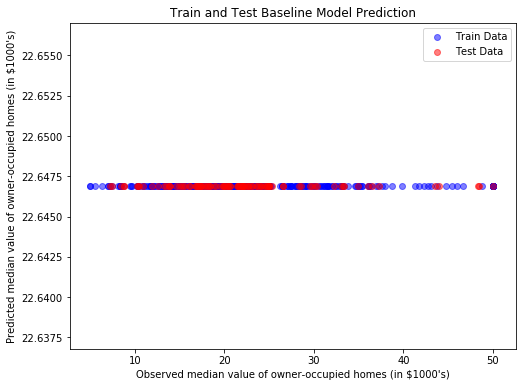

In [597]:
#Plotting
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

ax.scatter(bdata_train['MEDV'], train_predictions_baseline, c='blue', label='Train Data', alpha=0.5)
ax.scatter(bdata_test['MEDV'], test_predictions_baseline, c='red', label='Test Data', alpha=0.5)

ax.set_xlabel("Observed median value of owner-occupied homes (in $1000's)")
ax.set_ylabel("Predicted median value of owner-occupied homes (in $1000's)")
ax.set_title("Train and Test Baseline Model Prediction")

ax.legend()

plt.show(fig)

1. Train RMSE: 9.313421702432809

2. Test RMSE: 8.670683009395466

3. Training and Test set RMSE is comparable, in line with my expectation.

4. It took almost negligible (zero second) to compute the predicted value for test set.

### 1.4 Use local linear regression for prediction, and compute RMSE.

Create a model that predicts, for every observation of nitric oxide concentration the median home value using local linear regression
with Epanechnikov kernels (https://en.wikipedia.org/wiki/Kernel_(statistics)).
1. Create a scatter plot of the test and training data sets (use different colors for the two). Add on that plot the fit
that you get from the local linear regression.
2. Tune the smoothing parameter (the window that Epanechnikov kernels are nonegative) so that the RMSE for the test set is low. 


First create a function that implements the Epanechnikov kernel which you will need to weight the data points.

In [777]:
def epan_ker(target, data_x, gamma):
    '''
    Compute the epanechnikov weights. data_x denote the predictors (nitric oxide levels in our case)
    and target denotes the house median value. The gamma parameter controls the smoothing. 
    Inputs: predictors, targets and smoothing parameter gamma 
    '''
    dist = abs(target-data_x)
    
    gamma_percentile= np.percentile(dist, gamma*100)
    
    #scaling dist
    dist_scaled = dist/gamma_percentile

    weights =np.where(dist_scaled <= 1, 0.75*(1-dist_scaled**2), 0)
    
    return weights

Write the main code for local linear regression:


In [749]:
data_x = bdata_train['NOX']
data_y = bdata_train['MEDV']

In [778]:
def lowess(x,y,gamma):
    n = len(x)
    y_estimated = np.zeros(n)
    
    #Looping through all x-points
    for i in range(n):
        weights = epan_ker(x[i],data_x,gamma)
        wx=weights*data_x
        
        # mean of x and y vector 
        m_x, m_y = np.mean(wx), np.mean(y)
        
        # calculating cross-deviation and deviation about x 
        SS_xy = np.sum(y*wx) - n*m_y*m_x 
        SS_xx = np.sum(wx*wx) - n*m_x*m_x 
        
        # calculating regression coefficients
        b_1 = SS_xy / SS_xx 
        b_0 = m_y - b_1*m_x 
        
        y_estimated[i] = b_0 + b_1 * x[i] 

    return y_estimated

In [848]:
#Prediction on Train Data
y_train=bdata_train['MEDV']
x_train=bdata_train['NOX']
train_predicted=lowess(x_train,y_train,0.1)

In [849]:
#Prediction on Test Data
y_test=bdata_test['MEDV']
x_test=bdata_test['NOX']
test_predicted=lowess(x_test,y_test,0.1)

In [850]:
#Training RMSE
train_lowess_RMSE = compute_rmse(train_predicted, bdata_train['MEDV'])
print("Train RMSE:")
print(train_lowess_RMSE)

#Test RMSE
test_lowess_RMSE = compute_rmse(test_predicted,bdata_test['MEDV'])
print("Test RMSE:")
print(test_lowess_RMSE)

Train RMSE:
8.90480048674698
Test RMSE:
8.335377232173132


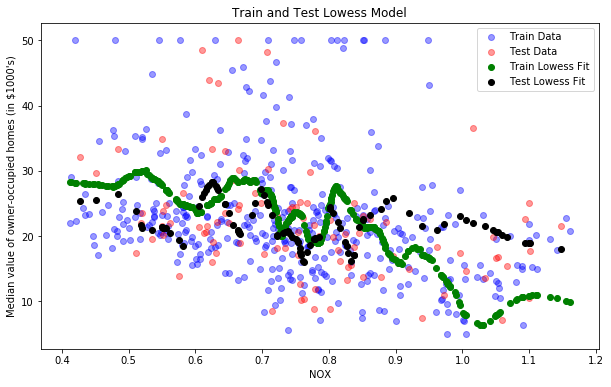

In [851]:
def plot_lowess(x_train, y_train, x_test, y_test, x_plot, y_plot):
    '''
    Scatter plot of data points along with lowess fit.
    Inputs: training and test data points, lowess fitted values
    '''
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot()

    ax.scatter(x_train, y_train, c='blue', label='Train Data', alpha=0.4)
    ax.scatter(x_test, y_test, c='red', label='Test Data', alpha=0.4)
    ax.scatter(x_train,x_plot,c="green",label='Train Lowess Fit')
    ax.scatter(x_test,y_plot,c="black",label='Test Lowess Fit')

    ax.set_xlabel("NOX")
    ax.set_ylabel("Median value of owner-occupied homes (in $1000's)")
    ax.set_title("Train and Test Lowess Model")

    ax.legend()

    plt.show(fig)
    
plot_lowess(x_train, y_train, x_test, y_test, train_predicted, test_predicted)

---

## Part 2: Nearest Neighbors


### 2.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm][1] distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).
[1]: https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm

In [602]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print(distance((3,4),(6,8),2))
5

"""
def distance(x1, x2, L):
    
    if type(x1)!=np.ndarray:
        x1 = np.array(x1)
    
    if type(x2)!=np.ndarray:
        x2 = np.array(x2)
    
            
    # L-norm distance when x2 has many points in it
    if x2.ndim!=1:
        dist = (np.sum((abs(x1 - x2))**L, axis=1))**(1/L)
        
    # L-norm distance when x2 has a single point in it
    else:
        dist = (np.sum((abs(x1 - x2))**L))**(1/L)

    return dist

### 2.2 Basic Nearest Neighbor algorithm

Your next task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Make sure to do the following
1. Fill in the function specification below
2. Use your algorithm to predict the median home value of every instance in the test set. Report the RMSE ("test RMSE")
3. Use your algorithm to predict the median home value of every instance in the training set and report the training RMSE.
4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in red. 
5. Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.
6. How does the performance (test RMSE and total runtime) of your nearest neighbors algorithm compare to the baseline in part 1.4?

In [603]:
"""
 Function for predicting the median house value using nearest neighbour approach.

    Parameters
    ----------
    X_Train : array
        Coordinates of the train points 
        
    Y_Train : array
        Observed values of the train points
        
    X_Test : array
        Coordinates of the test points
        
    Y_Test : array
        Observed values of the train points

    L : int
        Value of L to be used in computing distances.
        
    ignore_exact: boolean
        If true, don't use the same point for calculating nearest neighbour

    Returns
    -------
    Y_Test_predicted : array
        Predicted values of the test points.
        
    rmse : float
        RMSE between the predicted and observed values for the test points.
        
    timme_taken : float
        Duration (in seconds) to predict the values of the test points (does not include time to compute RMSE).
"""
def nneighbor(X_Train,Y_Train,X_Test,Y_Test, L):
    
    start_time = time.time()
    Y_Test_predicted = np.zeros(len(X_Test))
    
    #Compute distances
    for i in range(len(X_Test)):
        dist = distance(X_Test[i], X_Train, L)
        
        Y_Test_predicted[i] = Y_Train[np.argmin(dist)]
            
    # RMSE
    rmse = compute_rmse(Y_Test_predicted, Y_Test)
    
    t=(time.time() - start_time)
    
    print("Time taken: {:.3f} seconds".format(time.time() - start_time))
    
    return Y_Test_predicted,rmse,t


#Computing RMSE based on nearest neighbour
print("Train Results:")
#Train RMSE
train_NN_Predicted, train_NN_RMSE, train_NN_t  = nneighbor(bdata_train[['CRIM','RM']].values,bdata_train['MEDV'].values,
                                                bdata_train[['CRIM','RM']].values,bdata_train['MEDV'].values, 2)

print("Nearest Neighbour: Train RMSE")
print(train_NN_RMSE)

print()
print("Test Results:")
#Test RMSE
test_NN_Predicted, test_NN_RMSE, test_NN_t = nneighbor(bdata_train[['CRIM','RM']].values,bdata_train['MEDV'].values,
                                                       bdata_test[['CRIM','RM']].values,bdata_test['MEDV'].values,2)
print("Nearest Neighbour: Test RMSE")
print(test_NN_RMSE)

Train Results:
Time taken: 0.021 seconds
Nearest Neighbour: Train RMSE
0.0

Test Results:
Time taken: 0.004 seconds
Nearest Neighbour: Test RMSE
7.395964915391566


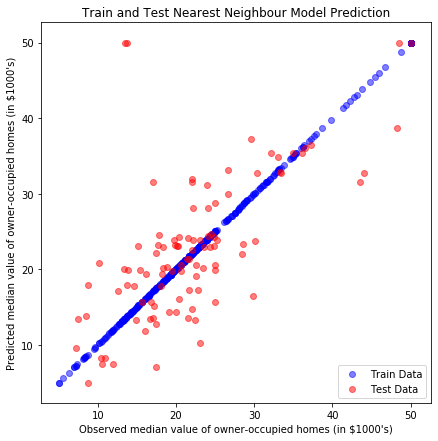

In [604]:
#Plotting
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.scatter(bdata_train['MEDV'], train_NN_Predicted, c='blue', label='Train Data', alpha=0.5)
ax.scatter(bdata_test['MEDV'], test_NN_Predicted, c='red', label='Test Data', alpha=0.5)

ax.set_xlabel("Observed median value of owner-occupied homes (in $1000's)")
ax.set_ylabel("Predicted median value of owner-occupied homes (in $1000's)")
ax.set_title("Train and Test Nearest Neighbour Model Prediction")

ax.legend()

plt.show(fig)

* Train Results:
    * Time taken: 0.021 seconds
    * Nearest Neighbour: Train RMSE
    * 0.0

* Test Results:
    * Time taken: 0.004 seconds
    * Nearest Neighbour: Test RMSE
    * 7.395964915391566

* Comparing with result in 1.3, Test RMSE has decreased a little from 8.67 to 7.395. In terms of runtime, it took around 0.004 seconds as compared to Zero second for baseline 

### 2.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations. What do you observe?

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

*NOTE 2*: In this case, there might not be a major impact on RMSE; don't get confused if you find that to be the case.

In [605]:
"""
Normalize an array

Parameters
----------
raw_data : array
    Original data

Returns
-------
normalized_data : array
    Normalized input data
"""

def normalize(raw_data):
    
    normalized_data= (raw_data - np.mean(raw_data))/np.std(raw_data)
        
    return normalized_data


bdata_train_normalized = bdata_train.copy()
for col in bdata_train.columns:
    if col!='MEDV':
        bdata_train_normalized[col] = normalize(bdata_train[col])
    
bdata_test_normalized = bdata_test.copy()
for col in bdata_test.columns:
    if col!='MEDV':
        bdata_test_normalized[col] = normalize(bdata_test[col])

In [607]:
#Computing RMSE based on normalized data using nearest neighbour

print("Train Results:")
#Train RMSE
train_NN_Predicted_normalized, train_NN_RMSE_normalized,train_NN_t_normalized = nneighbor(bdata_train_normalized[['CRIM','RM']].values,bdata_train_normalized['MEDV'].values,
                                                bdata_train_normalized[['CRIM','RM']].values,bdata_train_normalized['MEDV'].values, 2)

print("Nearest Neighbour: Train RMSE")
print(train_NN_RMSE_normalized)

print()
print("Test Results:")
#Test RMSE
test_NN_Predicted_normalized, test_NN_RMSE_normalized, test_NN_t_normalized = nneighbor(bdata_train_normalized[['CRIM','RM']].values,bdata_train_normalized['MEDV'].values,
                                                       bdata_test_normalized[['CRIM','RM']].values,bdata_test_normalized['MEDV'].values,2)
print("Nearest Neighbour: Test RMSE")
print(test_NN_RMSE_normalized)

Train Results:
Time taken: 0.021 seconds
Nearest Neighbour: Train RMSE
0.0

Test Results:
Time taken: 0.004 seconds
Nearest Neighbour: Test RMSE
5.164386806689533


RMSE for normalized test data (5.16) is smaller than previous RMSE of test data (around 7.39).  

### 2.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

*NOTE:* For this and all subsequent questions, you should use normalized features

In [188]:
bdata_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [608]:
#Trying models with features: LSTAT and CHAS with L=3

#Computing RMSE based on normalized data using nearest neighbour

print("Train Results:")
#Train RMSE
train_NN_Predicted_normalized, train_NN_RMSE_normalized,train_NN_t_normalized = nneighbor(bdata_train_normalized[['LSTAT','CHAS']].values,bdata_train_normalized['MEDV'].values,
                                                bdata_train_normalized[['LSTAT','CHAS']].values,bdata_train_normalized['MEDV'].values, 3)

print("Nearest Neighbour: Train RMSE")
print(train_NN_RMSE_normalized)

print()
print("Test Results:")
#Test RMSE
test_NN_Predicted_normalized, test_NN_RMSE_normalized, test_NN_t_normalized = nneighbor(bdata_train_normalized[['LSTAT','CHAS']].values,bdata_train_normalized['MEDV'].values,
                                                       bdata_test_normalized[['LSTAT','CHAS']].values,bdata_test_normalized['MEDV'].values,3)
print("Nearest Neighbour: Test RMSE")
print(test_NN_RMSE_normalized)

Train Results:
Time taken: 0.044 seconds
Nearest Neighbour: Train RMSE
0.0

Test Results:
Time taken: 0.011 seconds
Nearest Neighbour: Test RMSE
6.8762901579728055


In [609]:
#Trying models with features: PTRATIO and NOX with L=5

#Computing RMSE based on normalized data using nearest neighbour

print("Train Results:")
#Train RMSE
train_NN_Predicted_normalized, train_NN_RMSE_normalized,train_NN_t_normalized = nneighbor(bdata_train_normalized[['PTRATIO','NOX']].values,bdata_train_normalized['MEDV'].values,
                                                bdata_train_normalized[['PTRATIO','NOX']].values,bdata_train_normalized['MEDV'].values, 5)

print("Nearest Neighbour: Train RMSE")
print(train_NN_RMSE_normalized)

print()
print("Test Results:")
#Test RMSE
test_NN_Predicted_normalized, test_NN_RMSE_normalized, test_NN_t_normalized = nneighbor(bdata_train_normalized[['PTRATIO','NOX']].values,bdata_train_normalized['MEDV'].values,
                                                       bdata_test_normalized[['PTRATIO','NOX']].values,bdata_test_normalized['MEDV'].values,5)
print("Nearest Neighbour: Test RMSE")
print(test_NN_RMSE_normalized)

Train Results:
Time taken: 0.051 seconds
Nearest Neighbour: Train RMSE
0.0

Test Results:
Time taken: 0.013 seconds
Nearest Neighbour: Test RMSE
10.79526849050908


In [610]:
#Trying models with features: PTRATIO and LSTAT with L=4

#Computing RMSE based on normalized data using nearest neighbour

print("Train Results:")
#Train RMSE
train_NN_Predicted_normalized, train_NN_RMSE_normalized,train_NN_t_normalized = nneighbor(bdata_train_normalized[['PTRATIO','LSTAT']].values,bdata_train_normalized['MEDV'].values,
                                                bdata_train_normalized[['PTRATIO','LSTAT']].values,bdata_train_normalized['MEDV'].values, 4)

print("Nearest Neighbour: Train RMSE")
print(train_NN_RMSE_normalized)

print()
print("Test Results:")
#Test RMSE
test_NN_Predicted_normalized, test_NN_RMSE_normalized, test_NN_t_normalized = nneighbor(bdata_train_normalized[['PTRATIO','LSTAT']].values,bdata_train_normalized['MEDV'].values,
                                                       bdata_test_normalized[['PTRATIO','LSTAT']].values,bdata_test_normalized['MEDV'].values,4)
print("Nearest Neighbour: Test RMSE")
print(test_NN_RMSE_normalized)

Train Results:
Time taken: 0.044 seconds
Nearest Neighbour: Train RMSE
0.0

Test Results:
Time taken: 0.011 seconds
Nearest Neighbour: Test RMSE
6.202275213321493


In [611]:
#Trying models with features: PTRATIO,CRIM, NOX, AGE and LSTAT with L=4

#Computing RMSE based on normalized data using nearest neighbour

print("Train Results:")
#Train RMSE
train_NN_Predicted_normalized, train_NN_RMSE_normalized,train_NN_t_normalized = nneighbor(bdata_train_normalized[['PTRATIO','LSTAT','CRIM','NOX','AGE']].values,bdata_train_normalized['MEDV'].values,
                                                bdata_train_normalized[['PTRATIO','LSTAT','CRIM','NOX','AGE']].values,bdata_train_normalized['MEDV'].values, 4)

print("Nearest Neighbour: Train RMSE")
print(train_NN_RMSE_normalized)

print()
print("Test Results:")
#Test RMSE
test_NN_Predicted_normalized, test_NN_RMSE_normalized, test_NN_t_normalized = nneighbor(bdata_train_normalized[['PTRATIO','LSTAT','CRIM','NOX','AGE']].values,bdata_train_normalized['MEDV'].values,
                                                       bdata_test_normalized[['PTRATIO','LSTAT','CRIM','NOX','AGE']].values,bdata_test_normalized['MEDV'].values,4)
print("Nearest Neighbour: Test RMSE")
print(test_NN_RMSE_normalized)

Train Results:
Time taken: 0.083 seconds
Nearest Neighbour: Train RMSE
0.0

Test Results:
Time taken: 0.021 seconds
Nearest Neighbour: Test RMSE
7.156185443307761


In [612]:
#Trying models with features: PTRATIO,CRIM, NOX, AGE and LSTAT with L=6

#Computing RMSE based on normalized data using nearest neighbour

print("Train Results:")
#Train RMSE
train_NN_Predicted_normalized, train_NN_RMSE_normalized,train_NN_t_normalized = nneighbor(bdata_train_normalized[['PTRATIO','LSTAT','CRIM','NOX','AGE']].values,bdata_train_normalized['MEDV'].values,
                                                bdata_train_normalized[['PTRATIO','LSTAT','CRIM','NOX','AGE']].values,bdata_train_normalized['MEDV'].values, 6)

print("Nearest Neighbour: Train RMSE")
print(train_NN_RMSE_normalized)

print()
print("Test Results:")
#Test RMSE
test_NN_Predicted_normalized, test_NN_RMSE_normalized, test_NN_t_normalized = nneighbor(bdata_train_normalized[['PTRATIO','LSTAT','CRIM','NOX','AGE']].values,bdata_train_normalized['MEDV'].values,
                                                       bdata_test_normalized[['PTRATIO','LSTAT','CRIM','NOX','AGE']].values,bdata_test_normalized['MEDV'].values,6)
print("Nearest Neighbour: Test RMSE")
print(test_NN_RMSE_normalized)

Train Results:
Time taken: 0.082 seconds
Nearest Neighbour: Train RMSE
0.0

Test Results:
Time taken: 0.020 seconds
Nearest Neighbour: Test RMSE
7.352860290760701


* For me, the following combination of features worked the best, giving the smallest RMSE: **PTRATIO and LSTAT with L=4**
* Comparing the time taken by all the model, yes, choice of decisions do affect the runtime of the algorithm. 

### 2.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  One solution to this sort of overfitting is to use cross-validation (see K-fold [cross-validation][1].  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold][2] iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations. What do you observe?
[1]: http://en.wikipedia.org/wiki/Cross-validation_(statistics)
[2]: http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [613]:
np.random.seed(seed=13579)

# Using full original dataset for cross validation

# Length of each fold
len_fold = np.int(len(boston_data)/ 10)

# Randomly select folds
fold_index = np.random.choice(range(len(boston_data)), (10, len_fold), replace=False)

# Assign the folds
for i in range(10):
    boston_data.loc[fold_index[i], 'fold'] = i+1

# Initialize vector for storing each iteration result
RMSE_cv = np.zeros(10)
t_cv = np.zeros(10)

#Iteration
for i in range(10):
    bdata_train_fold = boston_data[boston_data['fold'] != (i+1)]
    bdata_test_fold =  boston_data[boston_data['fold'] == (i+1)]
    
    #Normalizing the train and test set for each iteration
    bdata_train_fold_norm = bdata_train_fold.copy()
    for col in bdata_train_fold.columns:
        if col!='MEDV':
            bdata_train_fold_norm[col] = normalize(bdata_train_fold[col])
    
    bdata_test_fold_norm = bdata_test_fold.copy()
    for col in bdata_test_fold.columns:
        if col!='MEDV':
            bdata_test_fold_norm[col] = normalize(bdata_test_fold[col])
    
    #Test RMSE
    predicted, rmse, t = nneighbor(bdata_train_fold_norm[['CRIM','RM']].values,bdata_train_fold_norm['MEDV'].values,
                                    bdata_test_fold_norm[['CRIM','RM']].values,bdata_test_fold_norm['MEDV'].values,2)
    
    RMSE_cv[i] = rmse
    t_cv[i] = t

RMSE_cv = pd.DataFrame(RMSE_cv,columns=['RMSE'])
RMSE_cv

Time taken: 0.002 seconds
Time taken: 0.002 seconds
Time taken: 0.002 seconds
Time taken: 0.002 seconds
Time taken: 0.003 seconds
Time taken: 0.002 seconds
Time taken: 0.002 seconds
Time taken: 0.002 seconds
Time taken: 0.003 seconds
Time taken: 0.003 seconds


,RMSE
0,7.959407
1,5.873228
2,6.627424
3,7.079379
4,9.657546
5,5.620302
6,9.610095
7,8.441078
8,7.916364
9,8.763025


In [393]:
#Average RMSE
np.mean(RMSE_cv.RMSE)

7.7547847620675014

In [614]:
#Total runtime for prediction
sum(t_cv)

0.022930383682250977

* Average RMSE: 7.75
* Total Runtime (Prediction): 0.02 seconds

### 2.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation and L2 normalization, report the RMSE for K=3 and the running time of the algorithm.

In [617]:
"""
Using 10-fold cross-validation, compute the RMSE for K nearest neighbours.

Parameters
----------
X : Coordinates of the points

Y : Observed values of the points

fold_num : int, Fold number for the point

L : int, Value of L to be used in computing distances

K : int, Value of K to be used in K nearest neighbours

Returns
-------
rmse : float
    Mean RMSE of all folds between the predicted and observed values.

t : float
    Duration (in seconds) to run the whole algorithm
"""

def knn(X,Y,fold_num, L, K):
    # start the watch
    t_start = time.time()
    
    #Storing vector for RMSE for 10 folds
    rmse_folds = np.zeros(10)
    
    # Iterating through the folds
    for i in range(10):   
        #Train and Test for each fold 
        X_train = X[fold_num!=(i+1)]
        Y_train = Y[fold_num!=(i+1)]
        X_test = X[fold_num==(i+1)]
        Y_test = Y[fold_num==(i+1)]
        
        # initiate the storage vector
        Y_test_predicted = np.zeros(len(X_test))
        
        # Predicting the median house value
        for j in range(len(X_test)):
            # calculate distance
            dist = distance(X_test[j], X_train, L)
            # calculate the mean Y of the K nearest points
            Y_test_predicted[j] = np.mean(Y_train[dist.argsort()[:K]])
            
        # RMSE
        rmse_folds[i] = compute_rmse(Y_test_predicted, Y_test)
        
    t = time.time() - t_start
    rmse = np.mean(rmse_folds)    
    
    return rmse,t

#Normalizing complete dataset 
boston_data_norm = boston_data.copy()
for col in boston_data.columns:
    if (col!='MEDV') & (col!= 'fold'):
        boston_data_norm[col] = normalize(boston_data[col])

rmse, t = knn(boston_data_norm[['CRIM','RM']].values,boston_data_norm['MEDV'].values,boston_data_norm['fold'].values, 2, 3)

print("RMSE:")
print(rmse)
print()
print("Time taken:")
print(t)

RMSE:
5.74443464321911

Time taken:
0.05784463882446289


### 2.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [331]:
rmse_K = np.zeros(25)

for i in range(25):
    rmse, t = knn(boston_data_norm[['CRIM','ZN','RM','AGE','DIS','TAX']].values,
                  boston_data_norm['MEDV'].values,
                  boston_data_norm['fold'].values, 2, i+1)
    rmse_K[i] = rmse
    
rmse_K = pd.DataFrame(rmse_K,columns=['RMSE'])
rmse_K.index.name = 'K'
rmse_K=rmse_K.reset_index()
rmse_K['K'] = rmse_K['K'] + 1
rmse_K.sort_values("RMSE")

,K,RMSE
5,6,4.961010
6,7,5.010529
4,5,5.023038
7,8,5.042667
8,9,5.099706
3,4,5.119586
2,3,5.144164
9,10,5.189657
10,11,5.209078
11,12,5.226179


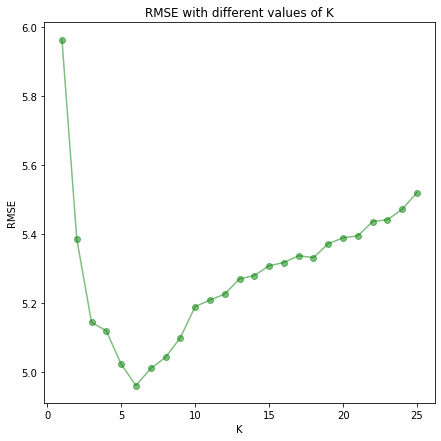

In [357]:
#Plotting
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.plot(rmse_K['K'], rmse_K['RMSE'],marker='o', c='green', alpha=0.5)

ax.set_xlabel("K")
ax.set_ylabel("RMSE")
ax.set_title("RMSE with different values of K");

* Best choice of K for this data is 6.
* As one can see in the graph, the RMSE decreases intitally with increase in the value of K, but after a point (K=6), it starts increasing again.

### Extra-Credit: Forward selection

Thus far the choice of predictor variables has been rather arbitrary. For extra credit, implement a basic [forward selection](http://www.stat.ubc.ca/~rollin/teach/643w04/lec/node41.html) algorithm to progressively include features that decrease the cross-validated RMSE of the model. Note that the optimal value of K may be different for each model, so you may want to use cross-validation to choose K each time (but it is also fine if you fix K at the optimal value from 2.7).  Create a graph that shows RMSE as a function of the number of features in the model. Label each point on the x-axis with the name of the feature that is added at that step in the forward selection algorithm. *(For instance, if the optimal single-feature model has CRIM with RMSE = 10, and the optimal two-feature model has CRIM+ZN with RMSE=9, the first x-axis label will say CRIM and the second x-axis lable with say ZN)*

In [635]:
#Forward Selection
# Using K= 6 as found optimal in 2.7 above

# Lsist of features
all_feature_list = boston_data_norm.columns[0:13]

#Number of features available 
num_features= len(all_feature_list)
feature_RMSE = np.zeros(num_features)
feature_list = []

#Iteration on the total number of features
for i in range(num_features):
    test_RMSE=[]
    test_feature_list = []
    
    for j in range(num_features):
        if all_feature_list[j] not in feature_list:
            test_features = copy.deepcopy(feature_list)
            test_features.append(all_feature_list[j])
            rmse, t = knn(boston_data_norm[test_features].values,
                  boston_data_norm['MEDV'].values,
                  boston_data_norm['fold'].values, 2, 6)
            test_RMSE.append(rmse)
            test_feature_list.append(all_feature_list[j])
    
    min_RMSE = np.argmin(test_RMSE)
    feature_RMSE[i] = test_RMSE[min_RMSE]
    feature_list.append(test_feature_list[min_RMSE])

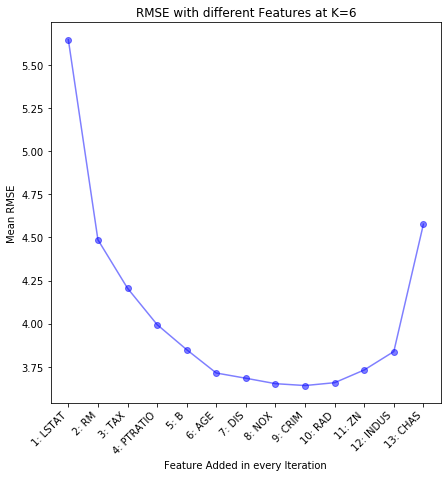

In [644]:
#Plotting
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.plot(np.arange(num_features), feature_RMSE,marker='o', c='blue', alpha=0.5)

#X-tick labels
x_tick_labels = []
for i in range(num_features):
    x_tick_labels.append('{}:{}'.format(i+1, feature_list[i]))
                         
ax.set_xlabel("Feature Added in every Iteration")
ax.set_xticks(np.arange(num_features))
ax.set_xticklabels(x_tick_labels,rotation=45, ha='right')
ax.set_ylabel("Mean RMSE")
ax.set_title("RMSE with different Features at K=6");